# Project: Real Estate Analysis - Part II

## Attributes

* id
* created_on
* operation
* property_type
* place_with_parent_names
* lat-lon
* lat
* lon
* price
* currency
* price_aprox_usd
* surface_total_in_m2
* surface_covered_in_m2
* price_usd_per_m2
* floor
* rooms
* expenses
* barrio
* properati_url

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)
 
sns.set_style("whitegrid")
sns.set_context("paper")

plt.rcParams['figure.figsize'] = (12,5)

In [10]:
path_dataset = 'datos_properati_limpios.csv.gz'
df = pd.read_csv(path_dataset, parse_dates=['created_on'])

In [11]:
df.columns

Index(['created_on', 'property_type', 'place_name', 'place_with_parent_names',
       'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'barrio'],
      dtype='object')

In [12]:
df.shape

(13756, 15)

### Outliers

Lets delete the null values and then the outliers.

In [13]:
# displot of price_usd_per_m2
df.isna().sum()

created_on                     0
property_type                  0
place_name                     0
place_with_parent_names        0
lat                            0
                           ...  
floor                      11754
rooms                       2531
expenses                   10195
properati_url                  0
barrio                         0
Length: 15, dtype: int64

In [14]:
df = df.dropna(subset=['price_usd_per_m2'])

In [15]:
df.isna().sum()

created_on                     0
property_type                  0
place_name                     0
place_with_parent_names        0
lat                            0
                           ...  
floor                      11093
rooms                       2240
expenses                    9616
properati_url                  0
barrio                         0
Length: 15, dtype: int64

C:\Users\61476\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


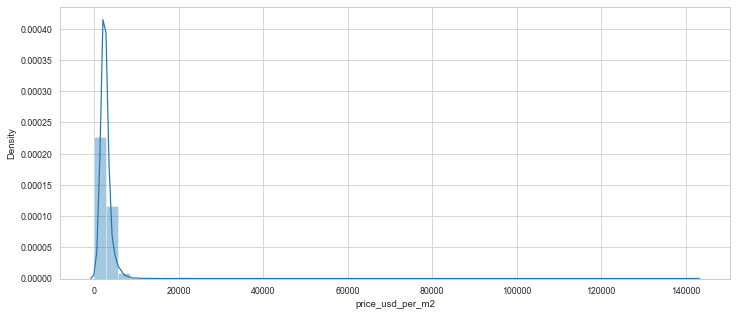

In [16]:
priceperm2 = sns.distplot(df['price_usd_per_m2'])

C:\Users\61476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


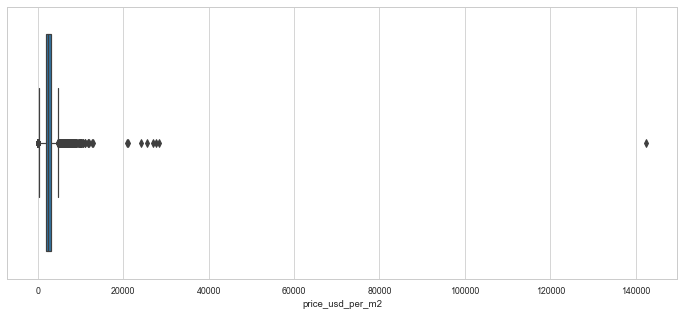

In [17]:
# boxplot of price_usd_per_m2 to see outliers

box = sns.boxplot(df['price_usd_per_m2'])

There are lots of outliers that cause distortion in some calculations

In [18]:
df['price_usd_per_m2'].describe()

count     12973.000000
mean       2695.065767
std        1773.086831
min           0.958333
25%        1959.183673
50%        2510.204082
75%        3125.000000
max      142450.141026
Name: price_usd_per_m2, dtype: float64

In [19]:
firstquantile = df['price_usd_per_m2'].quantile(0.25)
print(firstquantile)
thirdquantile = df['price_usd_per_m2'].quantile(0.75)
print(thirdquantile)

iqr = thirdquantile - firstquantile
iqr

1959.1836734693882
3125.0


1165.8163265306118

In [21]:
# Lets filter between first and third quantile, to drop outliers
df_filtere = df[df['price_usd_per_m2'] > firstquantile]
print(df_filtere.shape)

(9729, 15)


In [22]:
df_filtered = df_filtere[df_filtere['price_usd_per_m2'] < thirdquantile]
print(df_filtered.shape)

(6460, 15)


C:\Users\61476\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


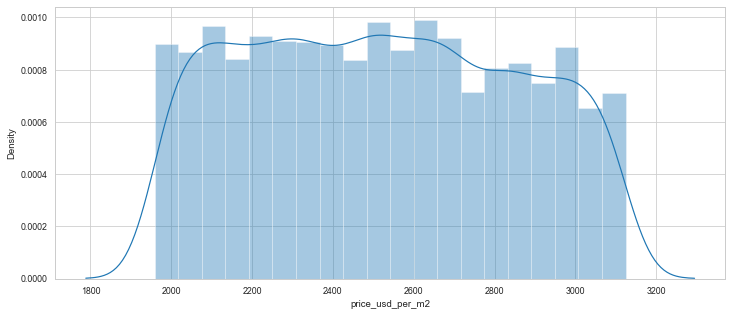

In [23]:
# New displot
priceperm2 = sns.distplot(df_filtered['price_usd_per_m2'])

C:\Users\61476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


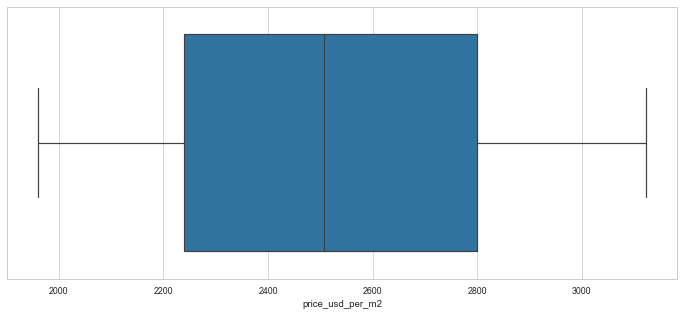

In [24]:
# New boxplot
box = sns.boxplot(df_filtered['price_usd_per_m2'])

In [25]:
df_filtered['price_usd_per_m2'].describe()

count    6460.000000
mean     2520.180738
std       328.940172
min      1959.259259
25%      2238.636364
50%      2507.092907
75%      2800.000000
max      3123.809524
Name: price_usd_per_m2, dtype: float64

In [26]:
df = df_filtered

### Null values

In [27]:
# Showing null values


price_aprox_usd =df['price_aprox_usd'].isna().mean()
price_usd_per_m2 =df['price_usd_per_m2'].isna().mean()
surface_total_in_m2 =df['surface_total_in_m2'].isna().mean()
surface_covered_in_m2=df['surface_covered_in_m2'].isna().mean()
rooms = df['rooms'].isna().mean()
floor = df['floor'].isna().mean()
expenses = df['expenses'].isna().mean()


print(price_aprox_usd)
print(price_usd_per_m2)
print(surface_total_in_m2)
print(surface_covered_in_m2)
print(rooms)
print(floor)
print(expenses)

0.0
0.0
0.0
0.03560371517027864
0.16377708978328173
0.8315789473684211
0.7181114551083592


In [28]:
#Drop attributes floor and expenses, they have lots of null values
df = df.drop(['floor', 'expenses'], axis = 1)

In [32]:
#Replacing null values with Imputer, filling with mean values in surface_total_in_m2 and surface_covered_in_m2
from numpy import nan
from sklearn.impute import SimpleImputer

In [33]:
imp = SimpleImputer(strategy='mean')

In [34]:
df.surface_total_in_m2 = imp.fit_transform(df[['surface_total_in_m2']])

In [35]:
df.surface_covered_in_m2 = imp.fit_transform(df[['surface_total_in_m2']])

In [36]:
#Imputing rooms
df.rooms = imp.fit_transform(df[['rooms']])

In [37]:
df.isna().sum()

created_on                 0
property_type              0
place_name                 0
place_with_parent_names    0
lat                        0
                          ..
surface_covered_in_m2      0
price_usd_per_m2           0
rooms                      0
properati_url              0
barrio                     0
Length: 13, dtype: int64

### Binary variables

In [38]:
#LabelEncoder to convert property_type in binary

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()


In [39]:
le.fit(df["property_type"])


LabelEncoder()

In [40]:
list(le.classes_)

['PH', 'apartment', 'house']

In [41]:
#OneHotEncoder to create a dataframe called categoricals_df
from sklearn.preprocessing import OneHotEncoder

In [42]:
onehot_encoder = OneHotEncoder(sparse=False)

In [43]:
categoricals_df = onehot_encoder.fit_transform(df[["property_type"]])

In [44]:
print(categoricals_df)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [45]:
#Joining categorical_df with df 
categoricals_df = pd.DataFrame(categoricals_df)

In [35]:
categoricals_df = categoricals_df.set_index(df.index)
df = pd.concat([df, categoricals_df], axis=1)
df.head()

,created_on,property_type,place_name,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,barrio,0,1,2
1,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.588912,-58.413494,340000.0,130.0,130.0,2615.384615,4.000000,https://www.properati.com.ar/1dzv6_venta_depar...,PALERMO,0.0,1.0,0.0
3,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,2.848389,https://www.properati.com.ar/1e0mq_venta_depar...,PALERMO,0.0,1.0,0.0
4,2017-08-30,house,Palermo Hollywood,|Argentina|Capital Federal|Palermo|Palermo Hol...,-34.579354,-58.436449,1200000.0,532.0,532.0,2255.639098,6.000000,https://www.properati.com.ar/1e1ve_venta_casa_...,PALERMO,0.0,0.0,1.0
5,2017-08-30,house,Palermo,|Argentina|Capital Federal|Palermo|,-34.579354,-58.436449,1200000.0,532.0,532.0,2255.639098,6.000000,https://www.properati.com.ar/1e1vf_venta_casa_...,PALERMO,0.0,0.0,1.0
7,2017-08-30,PH,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,-34.589776,-58.428558,219000.0,72.0,72.0,3041.666667,3.000000,https://www.properati.com.ar/1e1xj_venta_ph_pa...,PALERMO,1.0,0.0,0.0


### Calculating price_m2

In [46]:
def custom_division(x, y):
    if y > 0:
        res = x / y
    else:
        res = 0
    return res

df['price_m2'] = df.apply(lambda x: custom_division(x['price_aprox_usd'], x['surface_total_in_m2']), axis = 1)
df.drop(['price_usd_per_m2'], axis=1, inplace=True)

In [47]:
# Checking there are no null values
df_null = pd.DataFrame(df.isnull().sum() / df.shape[0], columns=['Porcentaje nulos'])
# showing there are no null values
df_null.loc[~(df_null==0).all(axis=1)]

,Porcentaje nulos


In [48]:
print("Final data set has {} entries".format(df.shape[0]))

Final data set has 6460 entries
